In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import matplotlib.image as img

from sklearn.metrics import classification_report
import cv2
from tensorflow import keras
from tensorflow.keras.layers import * 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
import gc

In [4]:
training_path = "archive/AugmentedAlzheimerDataset"
categories = os.listdir(training_path)

In [5]:
os.path.abspath(training_path)


'D:\\Dropbox\\Projects\\Full_Projects\\AlZheimer_Detection\\archive\\AugmentedAlzheimerDataset'

In [8]:
label = []
file_path = []
training_path = "archive/AugmentedAlzheimerDataset"
categories = os.listdir(training_path)
for category in categories:
    for file in os.listdir(os.path.join(training_path, category)):
        file_path.append(os.path.join(training_path, category, file))
        label.append(category)

In [3]:
final_data = pd.DataFrame(list(zip(file_path, label)), columns = ["file_path", "label"])

<AxesSubplot:ylabel='label'>

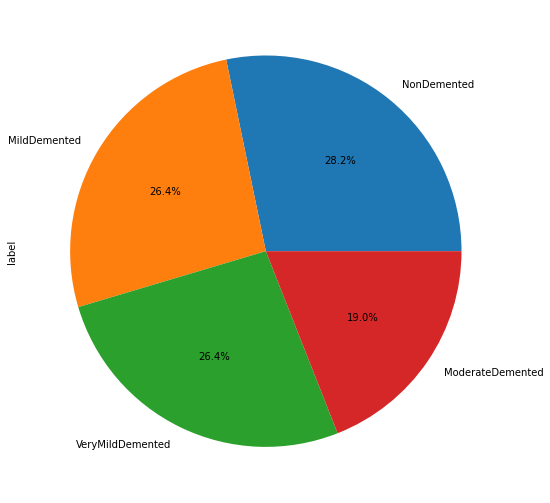

In [9]:
pie, ax = plt.subplots(figsize=[15,9])
(final_data["label"].value_counts()).plot.pie(autopct = "%.1f%%")

In [5]:
le = preprocessing.LabelEncoder()

In [6]:
le.fit(final_data["label"])

LabelEncoder()

In [7]:
le.transform(final_data["label"])

array([0, 0, 0, ..., 3, 3, 3])

In [8]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [9]:
images = []
for i in final_data.iterrows():
    image = cv2.imread(i[1]["file_path"])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150,150))
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    images.append(image)
images = np.array(images, dtype = "float32")

In [10]:
x_train, x_test, y_train, y_test = tts(images, label, test_size = 0.1) #Train test split
x_train, x_val, y_train, y_val = tts(x_train, y_train, test_size = 0.1) #Train validation Split

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [12]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [13]:
print("Training Data Shape is: ", str(x_train.shape), str(y_train.shape))
print("Validation Data Shape is: ", str(x_val.shape), str(y_val.shape))
print("Testing Data Shape is: ", str(x_test.shape), str(y_test.shape))

Training Data Shape is:  (27526, 150, 150, 3) (27526,)
Validation Data Shape is:  (3059, 150, 150, 3) (3059,)
Testing Data Shape is:  (3399, 150, 150, 3) (3399,)


In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), input_shape = x_train[0].shape, activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())


model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(4, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [16]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), 
              metrics = ["accuracy"])

In [17]:
model.fit(x_train,y_train, 
         validation_data = [x_val, y_val],
         batch_size = 32,
         epochs = 25,
         verbose = 2,
         callbacks = [tf.keras.callbacks.TensorBoard(log_dir = "./logs/image_classification_holdout")])

Epoch 1/25
861/861 - 19s - loss: 0.8654 - accuracy: 0.6274 - val_loss: 0.5766 - val_accuracy: 0.7676 - 19s/epoch - 22ms/step
Epoch 2/25
861/861 - 12s - loss: 0.4947 - accuracy: 0.8054 - val_loss: 0.4497 - val_accuracy: 0.8251 - 12s/epoch - 14ms/step
Epoch 3/25
861/861 - 12s - loss: 0.3744 - accuracy: 0.8588 - val_loss: 0.4220 - val_accuracy: 0.8388 - 12s/epoch - 14ms/step
Epoch 4/25
861/861 - 12s - loss: 0.2937 - accuracy: 0.8941 - val_loss: 0.4001 - val_accuracy: 0.8647 - 12s/epoch - 14ms/step
Epoch 5/25
861/861 - 12s - loss: 0.2376 - accuracy: 0.9146 - val_loss: 0.4071 - val_accuracy: 0.8624 - 12s/epoch - 14ms/step
Epoch 6/25
861/861 - 12s - loss: 0.2000 - accuracy: 0.9287 - val_loss: 0.4136 - val_accuracy: 0.8669 - 12s/epoch - 14ms/step
Epoch 7/25
861/861 - 12s - loss: 0.1656 - accuracy: 0.9420 - val_loss: 0.4510 - val_accuracy: 0.8630 - 12s/epoch - 14ms/step
Epoch 8/25
861/861 - 12s - loss: 0.1361 - accuracy: 0.9514 - val_loss: 0.4626 - val_accuracy: 0.8754 - 12s/epoch - 14ms/step


In [18]:
model.save("cat_dog.h5")

In [19]:
predictions = model.evaluate(x_test, y_test)

107/107 [==============================] - 1s 8ms/step - loss: 0.7868 - accuracy: 0.8782


In [20]:
gc.collect()
predictions = model.predict(x_test)
print(classification_report(y_test, np.round(np.argmax(predictions, axis = 1))))

107/107 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       889
           1       0.98      0.99      0.98       685
           2       0.91      0.83      0.87       969
           3       0.79      0.84      0.81       856

    accuracy                           0.88      3399
   macro avg       0.88      0.89      0.88      3399
weighted avg       0.88      0.88      0.88      3399



In [1]:
exec('print("hello world")')

hello world
